In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Raw_Housing_Prices.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

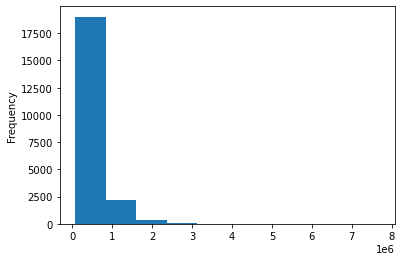

In [6]:
#distribution of target variable
data['Sale Price'].plot.hist()

In [7]:
#Lets see the quantiles of Sale Price
q1=data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
q1, q3

(321950.0, 645000.0)

In [8]:
#Lets find the InterQuartile range which is nothing but hte differnece between third quartile and first one.
iqr=q3-q1
iqr

323050.0

In [9]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [10]:
#What if there are any outliers in the Sale price column?
#Treating Outliers if any
def treatoutliers(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    return value
data['Sale Price']=data['Sale Price'].apply(treatoutliers)

In [11]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

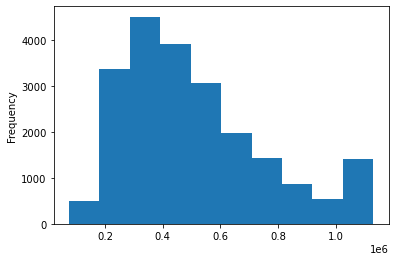

In [12]:
data['Sale Price'].plot.hist()

In [13]:
#This data now seems good as compared to the previous histogram.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [15]:
# Exploring target variable
# My task is to predict the sale price of the house, so our target i.e dependent variable here is Sale Price
# I see here that our target variable has some missing values, since our model will be learning from the target variable
# I will remove that whole entry that has missing sale price.

In [16]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [18]:
# Treating missing values of the other variables
missing=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
for i in missing:
    data[i]=imputer.fit_transform(data[i].values.reshape(-1,1))


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [19]:
# Treating missing value of Zipcode using strategy median is not suitable. But most_frequent strategy can be used.
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [21]:
#Now there are no missing values to be treated. 

In [22]:
#Renovated year is of no use to us as regression can't predict using a date. Data seems waste here.
#But the price of the house will get effected if the house has been renovated ever or not. This seems useful. So I am creating
#a variable "ever renovated" based on the renovated year column.
data["Ever Renovated"] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [23]:
#Similarly Date house was sold is not useful in there original form, but they are useful in predicting price
#if we change their form.
data['Purchase Year']=pd.DatetimeIndex(data['Date House was Sold']).year
data['Years since Renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']-data['Renovated Year']),0)

In [24]:
#Years since renovation will have effect on price as greater the years since renovation usually price decreases.
#dropping date variables from the data
data.drop(inplace=True,columns=['Purchase Year','Date House was Sold','Renovated Year'])

In [25]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [26]:
data['No of Floors'].value_counts()

1.0    10679
2.0     8239
1.5     1910
3.0      612
2.5      161
3.5        8
Name: No of Floors, dtype: int64

In [27]:
#Something is not right here, no of floors can't be in decimal. So I will just round off them to their nearest integer value.
data['No of Floors']=round(data['No of Floors'])

In [28]:
data['No of Floors'].value_counts()

1.0    10679
2.0    10310
3.0      612
4.0        8
Name: No of Floors, dtype: int64

In [29]:
data['No of Bathrooms'].value_counts()

2.50    5378
1.00    3851
1.75    3048
2.25    2049
2.00    1930
1.50    1445
2.75    1185
3.00     752
3.50     730
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: No of Bathrooms, dtype: int64

In [30]:
data['No of Bathrooms']=round(data['No of Bathrooms'])

In [31]:
data['No of Bathrooms'].value_counts()

2.0    13850
1.0     3932
3.0     2526
4.0     1200
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: No of Bathrooms, dtype: int64

In [32]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.0,1180.0,5650.0,1.0,No,None,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.0,2570.0,7242.0,2.0,No,None,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.0,770.0,10000.0,1.0,No,None,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.0,1960.0,5000.0,1.0,No,None,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.0,1680.0,8080.0,1.0,No,None,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [33]:
data=pd.get_dummies(data,columns=['Waterfront View'],drop_first=True)

In [34]:
data['No of Times Visited'].value_counts()

None      19485
Twice       963
Thrice      510
Once        332
Four        319
Name: No of Times Visited, dtype: int64

In [35]:
notv={'None':0,'Twice':2,'Thrice':3,'Once':1,'Four':4}
data['No of Times Visited']=data['No of Times Visited'].map(notv)

In [36]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [37]:
label={'Bad':0,'Okay':1,'Fair':2,'Good':3,'Excellent':4}
data['Condition of the House']=data['Condition of the House'].map(label)

In [38]:
data['Condition of the House'].value_counts()

2    14028
3     5678
4     1701
1      172
0       30
Name: Condition of the House, dtype: int64

In [39]:
data.columns

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'No of Times Visited', 'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Ever Renovated',
       'Years since Renovation', 'Waterfront View_Yes'],
      dtype='object')

In [40]:
data['Overall Grade'].value_counts()

7     8979
8     6066
9     2615
6     2038
10    1623
5      242
4       29
2       13
3        3
1        1
Name: Overall Grade, dtype: int64

In [41]:
#ID is of no use to use
data=data.drop(columns=['ID'])

In [42]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation,Waterfront View_Yes
0,221900.0,3,1.0,1180.0,5650.0,1.0,0,2,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0,0
1,538000.0,3,2.0,2570.0,7242.0,2.0,0,2,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26,0
2,180000.0,2,1.0,770.0,10000.0,1.0,0,2,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0,0
3,604000.0,4,3.0,1960.0,5000.0,1.0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0,0
4,510000.0,3,2.0,1680.0,8080.0,1.0,0,2,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0,0


In [43]:
data['Ever Renovated']=data['Ever Renovated'].map({'No':0,'Yes':1})

In [44]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation,Waterfront View_Yes
0,221900.0,3,1.0,1180.0,5650.0,1.0,0,2,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,0
1,538000.0,3,2.0,2570.0,7242.0,2.0,0,2,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,1,26,0
2,180000.0,2,1.0,770.0,10000.0,1.0,0,2,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,0
3,604000.0,4,3.0,1960.0,5000.0,1.0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0,0
4,510000.0,3,2.0,1680.0,8080.0,1.0,0,2,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,0


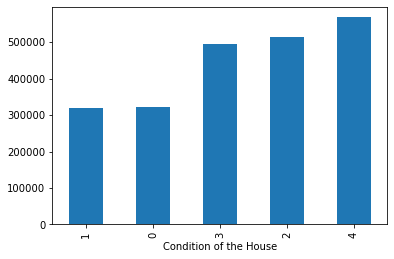

In [46]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')
plt.show()

In [47]:
#This is easily understandable that as the condition of the house gets better, its sale price will likely to increase.

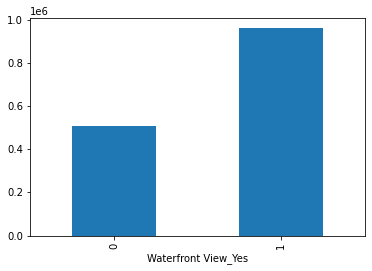

In [48]:
data.groupby('Waterfront View_Yes')['Sale Price'].mean().sort_values().plot(kind='bar')

In [49]:
#From this we conclude that usually the houses with waterfront view are expensive.

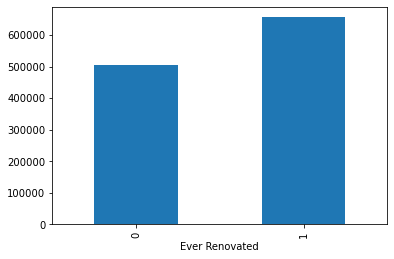

In [50]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [51]:
#It is also easily understandable that the if the house has been renovated its sale price will usually be more.

In [52]:
#Now having done with data exploration and preprocessing we carry on further with our regression model.
X=data.drop(columns=['Sale Price']) #Independent variable data
Y=data['Sale Price'] #Dependent Variable

In [53]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 80)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i],facecolor='green')
    plt.title(i)

In [56]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years since Renovation']

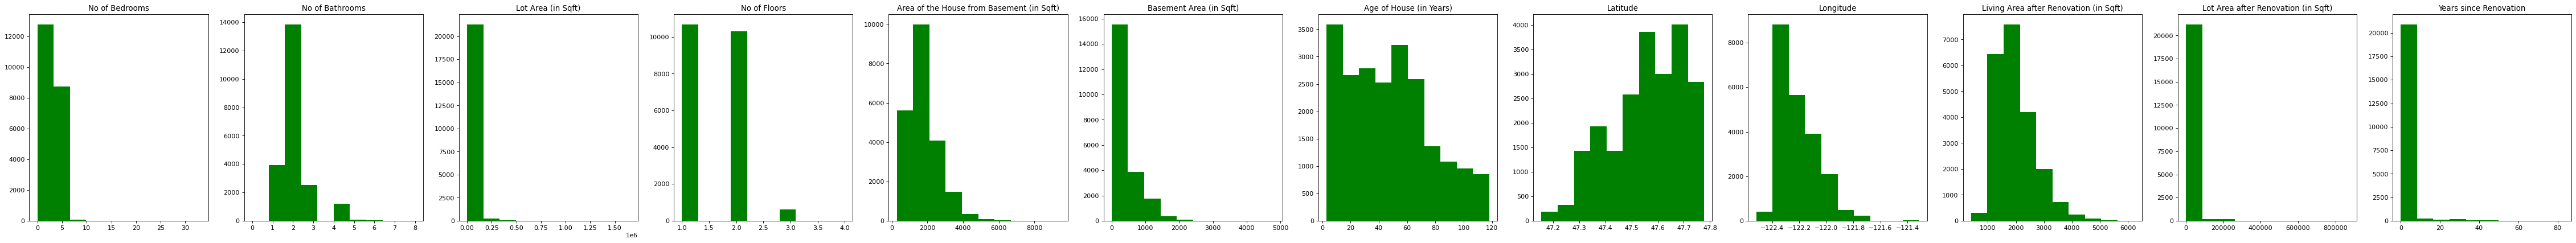

In [57]:
distribution(X, numerical_columns)

In [61]:
#Here from the above histograms we can see that the most of the data is rightly skewed by observing that the tail of graphs
#is longer towards the right side. For linear regression skewness should be removed. We can remove the right skewness by taking
#logarithmic of the values.
def right_skew(x):
    return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years since Renovation']

In [62]:
for i in right_skew_variables:
    X[i] = X[i].map(right_skew)

# Here some values may have become infinity, so we will them with null value and then remove them.

X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

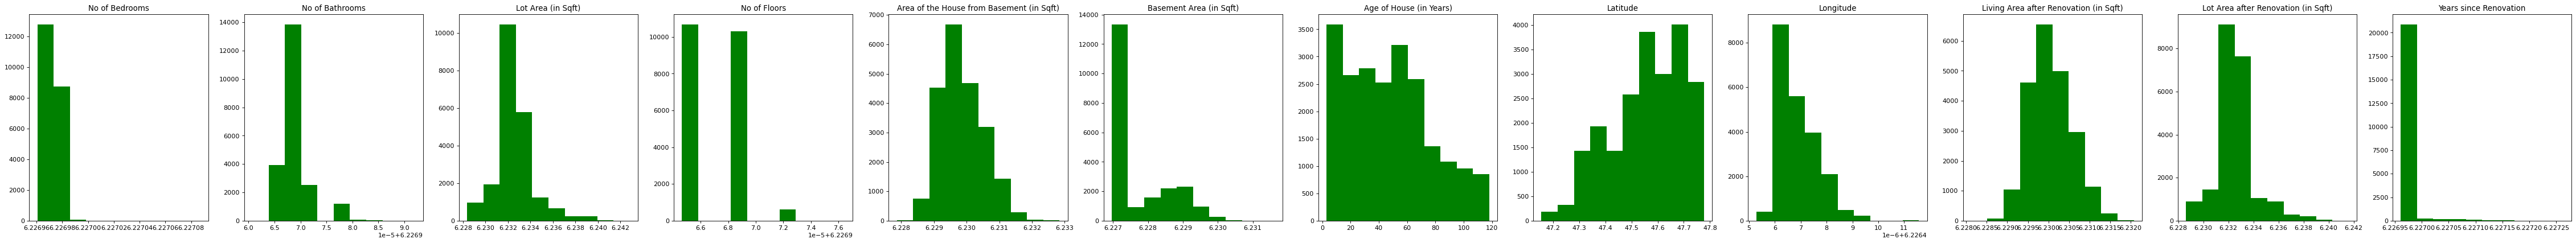

In [63]:
distribution(X, numerical_columns)

In [64]:
#Now we have to check the assumptions for linear regression
#Since linear regression is a distance based algorithm we need data to be scaled.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation,Waterfront View_Yes
0,-0.398646,-1.403290,-0.979905,-0.411841,-0.964489,-0.30579,-0.629203,-0.563993,-0.767575,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168914,-0.087181
1,-0.398646,-0.076933,0.533718,-0.138806,0.838931,-0.30579,-0.629203,-0.563993,0.642315,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827240,-0.087181
2,-1.477795,-1.403290,-1.426369,0.222409,-0.964489,-0.30579,-0.629203,-1.468566,-1.619628,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168914,-0.087181
3,0.678355,1.246780,-0.130534,-0.544371,-0.964489,-0.30579,2.444136,-0.563993,-1.012806,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168914,-0.087181
4,-0.398646,-0.076933,-0.435436,-0.016952,-0.964489,-0.30579,-0.629203,0.340581,0.025444,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168914,-0.087181


In [65]:
#Checking multicollinearity

In [66]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation,Waterfront View_Yes
No of Bedrooms,1.000000,0.490367,0.577470,0.175714,0.178350,0.079649,0.028514,0.349935,0.509519,0.276721,-0.154614,-0.153164,-0.008867,0.129998,0.404819,0.154570,0.018555,-0.006733,-0.006617
No of Bathrooms,0.490367,1.000000,0.701712,0.113791,0.326593,0.202627,-0.066499,0.553864,0.595104,0.311345,-0.377545,-0.144519,0.049118,0.149496,0.492390,0.101645,0.068887,0.021912,0.065395
Flat Area (in Sqft),0.577470,0.701712,1.000000,0.341686,0.322282,0.284678,-0.058922,0.705725,0.853616,0.373179,-0.318146,-0.199380,0.052538,0.240124,0.739462,0.318668,0.055111,0.024554,0.103841
Lot Area (in Sqft),0.175714,0.113791,0.341686,1.000000,-0.218246,0.121725,0.066323,0.165722,0.319775,0.056326,-0.005815,-0.279420,-0.146040,0.376130,0.361826,0.917927,0.022805,0.033049,0.074354
No of Floors,0.178350,0.326593,0.322282,-0.218246,1.000000,0.028025,-0.223156,0.412045,0.517859,-0.264426,-0.381283,-0.022679,0.064629,0.089113,0.240805,-0.214849,0.015412,0.007642,0.025860
No of Times Visited,0.079649,0.202627,0.284678,0.121725,0.028025,1.000000,0.045978,0.223661,0.161089,0.249394,0.053395,0.084830,0.006162,-0.078472,0.268492,0.118821,0.104051,0.094624,0.401856
Condition of the House,0.028514,-0.066499,-0.058922,0.066323,-0.223156,0.045978,1.000000,-0.143747,-0.153567,0.176036,0.361383,0.003076,-0.015008,-0.106546,-0.090174,0.073555,-0.060152,-0.012117,0.016650
Overall Grade,0.349935,0.553864,0.705725,0.165722,0.412045,0.223661,-0.143747,1.000000,0.723787,0.116024,-0.456711,-0.185844,0.111226,0.201765,0.676764,0.167500,0.010010,-0.023471,0.070332
Area of the House from Basement (in Sqft),0.509519,0.595104,0.853616,0.319775,0.517859,0.161089,-0.153567,0.723787,1.000000,-0.111372,-0.448716,-0.285312,-0.015295,0.360199,0.720707,0.301194,0.026074,0.013462,0.063276
Basement Area (in Sqft),0.276721,0.311345,0.373179,0.056326,-0.264426,0.249394,0.176036,0.116024,-0.111372,1.000000,0.153958,0.103575,0.121224,-0.177249,0.166721,0.045380,0.067738,0.028255,0.063249


In [67]:
#Varibales with correlation greater than 0.5 among themselves are needed to be checked. One of them with more information 
#about the target variable is to be kept and other one should be removed.
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'Living Area after Renovation (in Sqft)'],
  ['Area of the House from Basement (in Sqft)', 'No of Bedrooms'],
  ['Area of the House from Basement (in Sqft)', 

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X[:]
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range (vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.726265
No of Bathrooms                               2.312119
Flat Area (in Sqft)                          21.792580
Lot Area (in Sqft)                            6.834157
No of Floors                                  1.983990
No of Times Visited                           1.416662
Condition of the House                        1.259776
Overall Grade                                 2.900224
Area of the House from Basement (in Sqft)    23.436615
Basement Area (in Sqft)                       6.410998
Age of House (in Years)                       2.214068
Zipcode                                       1.668545
Latitude                                      1.192434
Longitude                                     1.881386
Living Area after Renovation (in Sqft)        2.930122
Lot Area after Renovation (in Sqft)           6.604176
Ever Renovated                                3.008699
Years since Renovation                        2.869309
Waterfront

In [69]:
def multicollinearity_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if (vif.max() > 5):
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data
                    

In [70]:
for i in range(7):
  vif_data = multicollinearity_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation,Waterfront View_Yes
0,-0.398646,-1.403290,-0.979905,-0.964489,-0.30579,-0.629203,-0.563993,-0.726430,0.544734,1.870094,-0.352576,-0.306108,-1.027661,-0.416287,-0.210155,-0.168914,-0.087181
1,-0.398646,-0.076933,0.533718,0.838931,-0.30579,-0.629203,-0.563993,0.539015,0.680915,0.879534,1.161645,-0.746519,-0.355795,-0.047631,4.758385,4.827240,-0.087181
2,-1.477795,-1.403290,-1.426369,-0.964489,-0.30579,-0.629203,-1.468566,-0.726430,1.293731,-0.933379,1.283619,-0.135645,1.130676,0.019005,-0.210155,-0.168914,-0.087181
3,0.678355,1.246780,-0.130534,-0.964489,-0.30579,2.444136,-0.563993,1.504571,0.204281,1.085122,-0.283288,-1.272266,-0.985942,-0.563303,-0.210155,-0.168914,-0.087181
4,-0.398646,-0.076933,-0.435436,-0.964489,-0.30579,-0.629203,0.340581,-0.726430,-0.544715,-0.073647,0.409587,1.199268,-0.166751,-0.069794,-0.210155,-0.168914,-0.087181


In [71]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.604883
 No of Bathrooms                           2.311579
 Flat Area (in Sqft)                       4.962769
 No of Floors                              1.847476
 No of Times Visited                       1.414170
 Condition of the House                    1.253908
 Overall Grade                             2.767706
 Basement Area (in Sqft)                   1.820423
 Age of House (in Years)                   2.174858
 Zipcode                                   1.666185
 Latitude                                  1.184944
 Longitude                                 1.864871
 Living Area after Renovation (in Sqft)    2.837279
 Lot Area after Renovation (in Sqft)       1.626105
 Ever Renovated                            3.003302
 Years since Renovation                    2.867034
 Waterfront View_Yes                       1.210201
 dtype: float64,
 17)

In [72]:
#Here we see that no value is greater than 5. So we dont have to remove any attribute now.

In [73]:
#Lets just store the data in the independent dataframe X which we had created.
X=vif_data[:]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [75]:
#We have splitted the data into training set and test set successfully.

In [76]:
#Now we can train our model

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [78]:
model.coef_

array([-11803.49682624,  18364.61105748,  84982.32583255,  13584.10457607,
        27743.52622509,  16819.69800435,  90002.21009907,  -4930.59377949,
        55743.84697764, -18131.29568932,  76494.05629927,  -9568.45752059,
        32513.56316887, -10934.15082898,  20323.7942451 , -15321.01708257,
        10470.8049277 ])

In [79]:
#Lets see the predictions
pred=model.predict(X_test)
pred

array([641715.811037  , 592991.96847785, 187911.197439  , ...,
       758630.07203677, 828044.9577026 , 518083.5421297 ])

In [80]:
model.score(X_test,Y_test)

0.7539147404098413

In [81]:
residuals=pred-Y_test
residuals=pd.DataFrame({'residuals':residuals,'predictions':pred})

In [82]:
res_table=residuals.sort_values(by='predictions')

In [83]:
z=[i for i in range(int(res_table['predictions'].max()))]
h=[0 for i in range(int(res_table['predictions'].max()))]

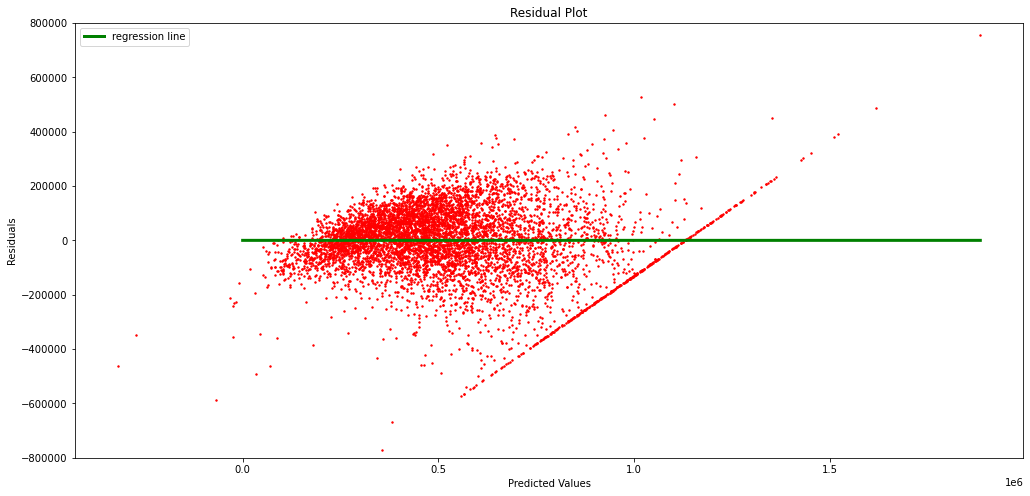

In [84]:
plt.figure(figsize=(17,8))
plt.scatter(res_table['predictions'],res_table['residuals'],color='red',s=2)
plt.plot(z, h, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()


In [85]:
#Since we know that distribution of errors should be normal, this is one of the assumption of the Linear Regression. We will 
#verify it now.

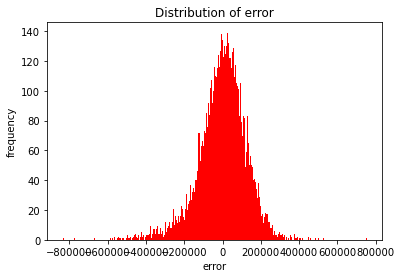

In [86]:
plt.hist(res_table['residuals'],color='red',bins=300)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("Distribution of error")
plt.show()

In [87]:
#Therefore assumption is correct

In [88]:
#Now lets see which attribute plays the major role in determining the price of the house

In [89]:
coefficient_table=pd.DataFrame({'Variable':X.columns,'Coefficients':model.coef_})
coefficient_table

,Variable,Coefficients
0,No of Bedrooms,-11803.496826
1,No of Bathrooms,18364.611057
2,Flat Area (in Sqft),84982.325833
3,No of Floors,13584.104576
4,No of Times Visited,27743.526225
5,Condition of the House,16819.698004
6,Overall Grade,90002.210099
7,Basement Area (in Sqft),-4930.593779
8,Age of House (in Years),55743.846978
9,Zipcode,-18131.295689


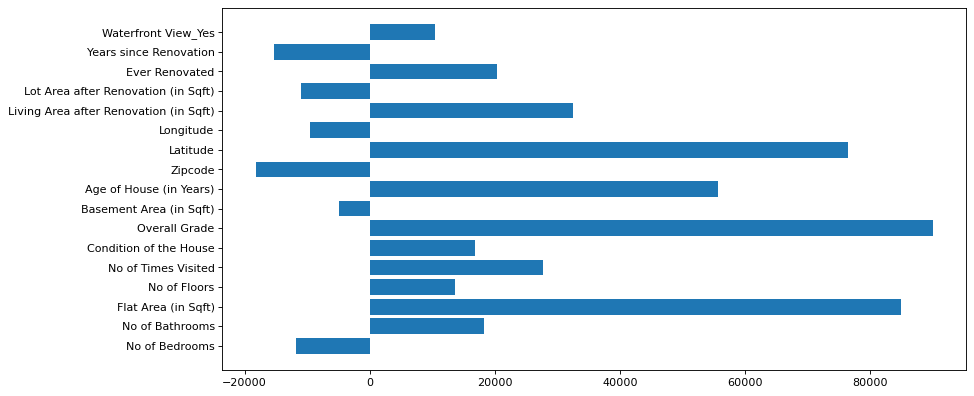

In [90]:
plt.figure(figsize=(12,6),dpi=80)
plt.barh(coefficient_table['Variable'],coefficient_table['Coefficients'])
plt.show()

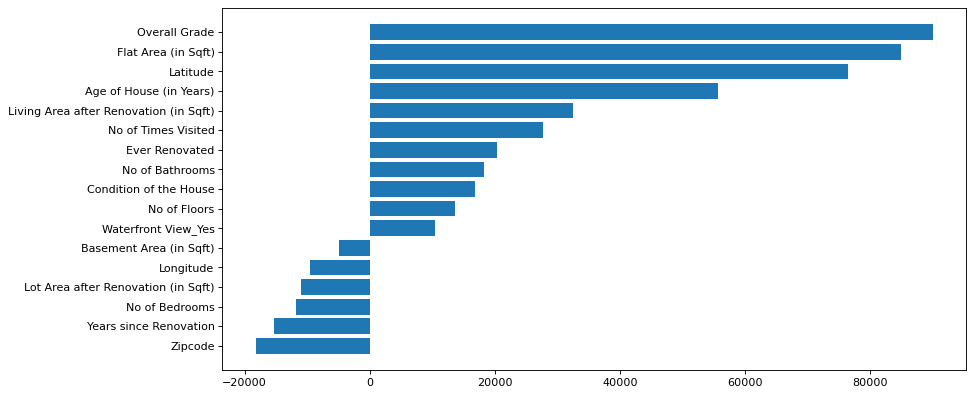

In [91]:
#Lets sort values for a better visualization
coefficient_table=coefficient_table.sort_values(by='Coefficients')
plt.figure(figsize=(12,6),dpi=80)
plt.barh(coefficient_table['Variable'],coefficient_table['Coefficients'])
plt.show()

In [92]:
# This seems better.
# Some interesting result we can interpret from this visualization.
# Overall Grade, Area play a positive significant role in the sale price. 
# Latitude plays a positive whereas longitude plays a negative significance in the sale price. This is something we didn't 
# expected of. This depends on the geographical conditions of the place from where this data was taken.
# Also one of the interesting conclusion we drawn here Age of the house also plays the major positive role. Usually people's tendency 
# is to buy new houses at higher prices, but our model tells us that as house age increases the sale price is likely
# to get increased.
# Years since renovation is negatively effecting the sale price as newly renovated houses are generally expensive.
# These are some of the observations i made using Linear Regression Model on this data.

In [94]:
#Now let us use some complex models and see if the performance gets better.

In [95]:
#SUPPORT VECTOR MACHINES
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,Y_train)

SVR()

In [98]:
svr.score(X_train,Y_train)

-0.05424322768021472

In [106]:
#XGBOOST

In [108]:
from xgboost import XGBRegressor as xgbr

In [109]:
xg = xgbr()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [110]:
xg.score(X_test,Y_test)

0.9009715598275926

In [112]:
#WOW, XGboost performed exceptionally well with the 90% accuracy over test data.

In [114]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor as DTR

In [117]:
dtr = DTR()
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [118]:
dtr.score(X_test,Y_test)

0.7860959482781746

In [122]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()
cbr.fit(X_train,Y_train)

Learning rate set to 0.062889
0:	learn: 238280.9118940	total: 265ms	remaining: 4m 24s
1:	learn: 228235.3137553	total: 298ms	remaining: 2m 28s
2:	learn: 219204.5106643	total: 316ms	remaining: 1m 44s
3:	learn: 210360.7427482	total: 326ms	remaining: 1m 21s
4:	learn: 202138.0948724	total: 333ms	remaining: 1m 6s
5:	learn: 194695.6873584	total: 341ms	remaining: 56.5s
6:	learn: 187796.5465913	total: 347ms	remaining: 49.3s
7:	learn: 181260.9902604	total: 356ms	remaining: 44.1s
8:	learn: 175731.2314221	total: 363ms	remaining: 39.9s
9:	learn: 170128.8592024	total: 370ms	remaining: 36.6s
10:	learn: 164725.4594270	total: 376ms	remaining: 33.8s
11:	learn: 159792.8420646	total: 383ms	remaining: 31.6s
12:	learn: 155099.1812294	total: 390ms	remaining: 29.6s
13:	learn: 150937.4853287	total: 396ms	remaining: 27.9s
14:	learn: 147295.3620054	total: 403ms	remaining: 26.4s
15:	learn: 143652.3410416	total: 409ms	remaining: 25.1s
16:	learn: 140046.5542576	total: 416ms	remaining: 24s
17:	learn: 137110.4294783	

151:	learn: 80368.1831596	total: 1.48s	remaining: 8.23s
152:	learn: 80316.2250208	total: 1.48s	remaining: 8.22s
153:	learn: 80276.1217954	total: 1.49s	remaining: 8.2s
154:	learn: 80179.8750220	total: 1.5s	remaining: 8.19s
155:	learn: 80093.1079792	total: 1.51s	remaining: 8.19s
156:	learn: 80026.3777226	total: 1.52s	remaining: 8.18s
157:	learn: 79933.1026015	total: 1.53s	remaining: 8.15s
158:	learn: 79845.2806625	total: 1.54s	remaining: 8.14s
159:	learn: 79779.3543460	total: 1.55s	remaining: 8.12s
160:	learn: 79693.5060073	total: 1.55s	remaining: 8.1s
161:	learn: 79615.5500550	total: 1.56s	remaining: 8.08s
162:	learn: 79572.2486477	total: 1.57s	remaining: 8.05s
163:	learn: 79524.0443450	total: 1.57s	remaining: 8.03s
164:	learn: 79456.8103075	total: 1.58s	remaining: 8.01s
165:	learn: 79394.4731643	total: 1.59s	remaining: 7.99s
166:	learn: 79316.9305194	total: 1.6s	remaining: 7.96s
167:	learn: 79216.2702008	total: 1.6s	remaining: 7.94s
168:	learn: 79153.7921596	total: 1.61s	remaining: 7.9

312:	learn: 72805.4868180	total: 2.68s	remaining: 5.89s
313:	learn: 72784.4206635	total: 2.69s	remaining: 5.88s
314:	learn: 72753.4785489	total: 2.7s	remaining: 5.87s
315:	learn: 72724.0433403	total: 2.71s	remaining: 5.87s
316:	learn: 72690.7658057	total: 2.72s	remaining: 5.85s
317:	learn: 72630.7527092	total: 2.72s	remaining: 5.84s
318:	learn: 72607.4916840	total: 2.73s	remaining: 5.83s
319:	learn: 72572.1279437	total: 2.74s	remaining: 5.81s
320:	learn: 72557.7131385	total: 2.74s	remaining: 5.8s
321:	learn: 72534.9104103	total: 2.75s	remaining: 5.79s
322:	learn: 72497.8674730	total: 2.76s	remaining: 5.78s
323:	learn: 72489.6178263	total: 2.76s	remaining: 5.76s
324:	learn: 72464.8275625	total: 2.77s	remaining: 5.75s
325:	learn: 72441.3545421	total: 2.78s	remaining: 5.74s
326:	learn: 72415.2068157	total: 2.78s	remaining: 5.73s
327:	learn: 72384.5655392	total: 2.79s	remaining: 5.71s
328:	learn: 72345.3395439	total: 2.79s	remaining: 5.7s
329:	learn: 72321.0514744	total: 2.8s	remaining: 5.

469:	learn: 68899.0459984	total: 3.89s	remaining: 4.39s
470:	learn: 68879.9257863	total: 3.9s	remaining: 4.38s
471:	learn: 68851.6566296	total: 3.91s	remaining: 4.37s
472:	learn: 68831.2443324	total: 3.92s	remaining: 4.37s
473:	learn: 68803.9070609	total: 3.92s	remaining: 4.35s
474:	learn: 68783.7302557	total: 3.93s	remaining: 4.34s
475:	learn: 68755.3311144	total: 3.94s	remaining: 4.33s
476:	learn: 68737.4572590	total: 3.95s	remaining: 4.33s
477:	learn: 68721.2798673	total: 3.95s	remaining: 4.32s
478:	learn: 68700.2667569	total: 3.96s	remaining: 4.31s
479:	learn: 68682.4487577	total: 3.96s	remaining: 4.3s
480:	learn: 68663.6477267	total: 3.97s	remaining: 4.29s
481:	learn: 68646.7007398	total: 3.98s	remaining: 4.27s
482:	learn: 68631.3551562	total: 3.98s	remaining: 4.26s
483:	learn: 68605.6662080	total: 3.99s	remaining: 4.25s
484:	learn: 68578.4603668	total: 4s	remaining: 4.24s
485:	learn: 68561.7138021	total: 4s	remaining: 4.23s
486:	learn: 68536.7906427	total: 4.01s	remaining: 4.22s


635:	learn: 65751.7834150	total: 5.13s	remaining: 2.94s
636:	learn: 65736.4958554	total: 5.15s	remaining: 2.94s
637:	learn: 65712.9806074	total: 5.16s	remaining: 2.93s
638:	learn: 65700.2197724	total: 5.17s	remaining: 2.92s
639:	learn: 65689.1285923	total: 5.18s	remaining: 2.91s
640:	learn: 65672.3752320	total: 5.19s	remaining: 2.9s
641:	learn: 65659.2806018	total: 5.2s	remaining: 2.9s
642:	learn: 65649.8802704	total: 5.21s	remaining: 2.89s
643:	learn: 65629.1314684	total: 5.22s	remaining: 2.88s
644:	learn: 65615.8809768	total: 5.22s	remaining: 2.88s
645:	learn: 65608.6966613	total: 5.23s	remaining: 2.87s
646:	learn: 65590.4296411	total: 5.24s	remaining: 2.86s
647:	learn: 65564.9547280	total: 5.25s	remaining: 2.85s
648:	learn: 65548.5569487	total: 5.25s	remaining: 2.84s
649:	learn: 65522.5227092	total: 5.26s	remaining: 2.83s
650:	learn: 65502.7286405	total: 5.27s	remaining: 2.83s
651:	learn: 65480.8679473	total: 5.28s	remaining: 2.82s
652:	learn: 65461.6624135	total: 5.29s	remaining: 2

791:	learn: 63212.1048826	total: 6.32s	remaining: 1.66s
792:	learn: 63199.3906806	total: 6.33s	remaining: 1.65s
793:	learn: 63188.1899673	total: 6.33s	remaining: 1.64s
794:	learn: 63174.1555923	total: 6.34s	remaining: 1.64s
795:	learn: 63164.4079443	total: 6.35s	remaining: 1.63s
796:	learn: 63149.6508780	total: 6.36s	remaining: 1.62s
797:	learn: 63133.6313592	total: 6.37s	remaining: 1.61s
798:	learn: 63117.9596713	total: 6.37s	remaining: 1.6s
799:	learn: 63094.0531553	total: 6.38s	remaining: 1.59s
800:	learn: 63086.0213028	total: 6.38s	remaining: 1.59s
801:	learn: 63071.7517230	total: 6.39s	remaining: 1.58s
802:	learn: 63058.4841487	total: 6.4s	remaining: 1.57s
803:	learn: 63044.3707061	total: 6.41s	remaining: 1.56s
804:	learn: 63018.4052041	total: 6.41s	remaining: 1.55s
805:	learn: 62998.6212722	total: 6.42s	remaining: 1.54s
806:	learn: 62985.0075087	total: 6.42s	remaining: 1.54s
807:	learn: 62972.5096800	total: 6.43s	remaining: 1.53s
808:	learn: 62961.3626761	total: 6.44s	remaining: 

952:	learn: 60938.5915855	total: 7.54s	remaining: 372ms
953:	learn: 60928.1460803	total: 7.54s	remaining: 364ms
954:	learn: 60909.8736326	total: 7.55s	remaining: 356ms
955:	learn: 60893.7891215	total: 7.56s	remaining: 348ms
956:	learn: 60880.5603291	total: 7.57s	remaining: 340ms
957:	learn: 60868.2727000	total: 7.58s	remaining: 333ms
958:	learn: 60861.4836159	total: 7.59s	remaining: 325ms
959:	learn: 60850.9855431	total: 7.6s	remaining: 317ms
960:	learn: 60844.0102262	total: 7.61s	remaining: 309ms
961:	learn: 60827.6037390	total: 7.62s	remaining: 301ms
962:	learn: 60813.4424200	total: 7.63s	remaining: 293ms
963:	learn: 60802.3717837	total: 7.64s	remaining: 285ms
964:	learn: 60784.0349742	total: 7.65s	remaining: 277ms
965:	learn: 60766.0286230	total: 7.66s	remaining: 270ms
966:	learn: 60751.1217809	total: 7.67s	remaining: 262ms
967:	learn: 60734.5808693	total: 7.68s	remaining: 254ms
968:	learn: 60722.7483417	total: 7.69s	remaining: 246ms
969:	learn: 60707.2449242	total: 7.7s	remaining: 

In [123]:
cbr.score(X_test,Y_test)

0.9156576637775514

In [139]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

In [140]:
rfr.score(X_test,Y_test)

0.8941147680604373

In [141]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train,Y_train)

LGBMRegressor()

In [142]:
lgbm.score(X_test,Y_test)

0.906181866025424

In [191]:
score_table = pd.DataFrame({"Regressor":['Linear Regression','Decision Tree','Random Forest','XGboost','LightGBM','CatBoost'],
                            "Score":[model.score(X_test,Y_test),dtr.score(X_test,Y_test),rfr.score(X_test,Y_test),xg.score(X_test,Y_test),lgbm.score(X_test,Y_test),cbr.score(X_test,Y_test)]})

In [192]:
score_table['Score'] = round(score_table['Score']*100,1)

In [193]:
score_table

,Regressor,Score
0,Linear Regression,75.4
1,Decision Tree,78.6
2,Random Forest,89.4
3,XGboost,90.1
4,LightGBM,90.6
5,CatBoost,91.6


In [194]:
#Here we get the accuracy of 91.6% from the catboost regressor.